# 2019 DSB EDA : 'World' and 'Title' sequence

![Whole World](https://user-images.githubusercontent.com/30274701/68391745-9770aa00-01ab-11ea-87eb-e8fba91917d2.JPG)

__PBS KIDS Measure Up! App__ have four world(`TREETOPCITY`, `CRYSTALCAVES`, `MAGMAPEAK`, `None`) and __five `Assessment`__. Each world have many titles(courses) and __the APP__ suggest course's procedure.

In this kernel, find the title's sequence(order).

![](https://user-images.githubusercontent.com/30274701/68392259-bfacd880-01ac-11ea-9de5-102f85865019.jpg)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import operator

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-science-bowl-2019/test.csv
/kaggle/input/data-science-bowl-2019/specs.csv
/kaggle/input/data-science-bowl-2019/train.csv
/kaggle/input/data-science-bowl-2019/train_labels.csv
/kaggle/input/data-science-bowl-2019/sample_submission.csv


In [2]:
%%time
# Read in the data CSV files
train = pd.read_csv('../input/data-science-bowl-2019/train.csv')
train_labels = pd.read_csv('../input/data-science-bowl-2019/train_labels.csv')
test = pd.read_csv('../input/data-science-bowl-2019/test.csv')
specs = pd.read_csv('../input/data-science-bowl-2019/specs.csv')
ss = pd.read_csv('../input/data-science-bowl-2019/sample_submission.csv')

CPU times: user 1min 13s, sys: 16.6 s, total: 1min 30s
Wall time: 1min 30s


If we regard `None` world is just intro World, main world is three. In this game, we can find specific `Assessment` is in one world. 

* Mushroom Sorter -> TREETOPCITY
* Bird Measurer -> TREETOPCITY
* Cart Balancer -> CRYSTALCAVES
* Chest Sorter -> CRYSTALCAVES
* Cauldron Filler -> MAGMAPEAK

In test, we have to predict only last `Assesment`, so it's important specific world's procedure.

In [3]:
assess_list = ['Bird Measurer', 'Cart Balancer', 'Cauldron Filler', 'Chest Sorter', 'Mushroom Sorter']
world_list = ['MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES']

In [4]:
for a in assess_list:
    world = train.loc[train['title'].str.contains(a), 'world'].unique()
    print('{} Assessment in {} World'.format(a, world))

Bird Measurer Assessment in ['TREETOPCITY'] World
Cart Balancer Assessment in ['CRYSTALCAVES'] World
Cauldron Filler Assessment in ['MAGMAPEAK'] World
Chest Sorter Assessment in ['CRYSTALCAVES'] World
Mushroom Sorter Assessment in ['TREETOPCITY'] World


In the game, each world have several course. My main idea is __most players play the game in order.__

So I find the path that many users played.

In [5]:
print('Find_course functions')
def world_in_label(df, world):
    if world == 'MAGMAPEAK':
        df = df.loc[df['title'].str.contains('Cauldron Filler')]
    elif world == 'TREETOPCITY':
        df = df.loc[(df['title'].str.contains('Bird Measurer')) | (df['title'].str.contains('Mushroom Sorter'))]
    elif world == 'CRYSTALCAVES':
        df = df.loc[(df['title'].str.contains('Cauldron Filler')) | (df['title'].str.contains('Chest Sorter'))]
    
    return df['installation_id'].unique()

def find_course(world):
    label_ids = world_in_label(train_labels, world)
    world_df = train.query('world=="{}"'.format(world))[['installation_id', 'world', 'title']]
    world_df = world_df.loc[world_df['installation_id'].isin(label_ids)]
    ids = world_df['installation_id'].unique()
    num_course = world_df['title'].nunique()
    
    course_d = dict()
    
    print('{} ids'.format(len(ids)))
    for i in ids:
        if i not in label_ids:
            continue
        else:
            id_df = world_df.query('installation_id=="{}"'.format(i))
            if id_df['title'].nunique() == num_course:
                try:
                    course_d[str(id_df['title'].unique())] += 1
                except:
                    course_d[str(id_df['title'].unique())] = 1    
    return course_d

Find_course functions


In [6]:
w_dict = dict()
for w in world_list:
    print('World : {}'.format(w))
    w_dict[w] = find_course(w)
    print(sorted(w_dict[w].items(), key=operator.itemgetter(1), reverse=True)[:5])
    print('='*100)

World : MAGMAPEAK
1985 ids
[("['Magma Peak - Level 1' 'Sandcastle Builder (Activity)' 'Slop Problem'\n 'Scrub-A-Dub' 'Watering Hole (Activity)' 'Magma Peak - Level 2'\n 'Dino Drink' 'Bubble Bath' 'Bottle Filler (Activity)' 'Dino Dive'\n 'Cauldron Filler (Assessment)']", 252), ("['Magma Peak - Level 1' 'Sandcastle Builder (Activity)' 'Scrub-A-Dub'\n 'Watering Hole (Activity)' 'Magma Peak - Level 2' 'Dino Drink'\n 'Bubble Bath' 'Bottle Filler (Activity)' 'Dino Dive'\n 'Cauldron Filler (Assessment)' 'Slop Problem']", 10), ("['Magma Peak - Level 1' 'Magma Peak - Level 2'\n 'Sandcastle Builder (Activity)' 'Slop Problem' 'Scrub-A-Dub'\n 'Watering Hole (Activity)' 'Dino Drink' 'Bubble Bath'\n 'Bottle Filler (Activity)' 'Dino Dive' 'Cauldron Filler (Assessment)']", 8), ("['Magma Peak - Level 1' 'Sandcastle Builder (Activity)' 'Slop Problem'\n 'Scrub-A-Dub' 'Magma Peak - Level 2' 'Watering Hole (Activity)'\n 'Dino Drink' 'Bubble Bath' 'Bottle Filler (Activity)' 'Dino Dive'\n 'Cauldron Filler (A

In plot, most users play the APP in particular path.

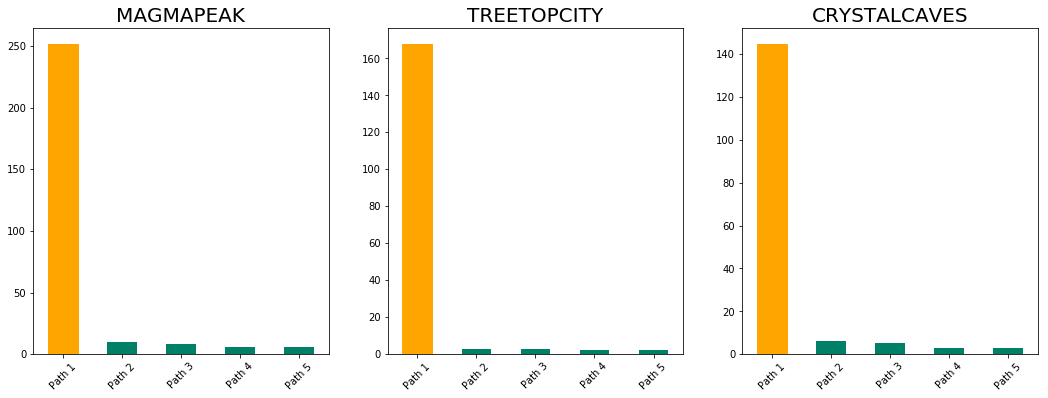

In [7]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
for num, w in enumerate(world_list):
#with sns.axes_style('Set1'):
    plot = pd.DataFrame(sorted(w_dict[w].items(), key=operator.itemgetter(1), reverse=True)[:5]).plot(kind='bar', cmap='summer', ax=ax[num])
    plot.set_title(w, fontsize=20)
    plot.patches[0].set_color('orange')
    plot.set_xticklabels(['Path {}'.format(i+1)  for i in range(5)], rotation=45)
    plot.legend().remove()

Most user's path is below.

### CRYSTALCAVES(15)

* 'Crystal Caves - Level 1' 
* 'Chow Time' 
* 'Balancing Act'
* 'Chicken Balancer (Activity)' 
* 'Lifting Heavy Things' 
* 'Crystal Caves - Level 2' 
* 'Honey Cake' 
* 'Happy Camel'
* 'Cart Balancer (Assessment)' 
* 'Leaf Leader' 
* 'Crystal Caves - Level 3'
* 'Heavy, Heavier, Heaviest' 
* 'Pan Balance' 
* 'Egg Dropper (Activity)'
* 'Chest Sorter (Assessment)'


### TREETOPCITY(17)

* 'Tree Top City - Level 1' 
* 'Ordering Spheres' 
* 'All Star Sorting'
* 'Costume Box'
* 'Fireworks (Activity)'
* '12 Monkeys'
* 'Tree Top City - Level 2' 
* 'Flower Waterer (Activity)' 
* 'Pirate's Tale
* 'Mushroom Sorter (Assessment)'
* 'Air Show'
* 'Treasure Map'
* 'Tree Top City - Level 3'
* 'Crystals Rule'
* 'Rulers'
* 'Bug Measurer (Activity)' 
* 'Bird Measurer (Assessment)'


### MAGMA PEAK(11)

* 'Magma Peak - Level 1'
* 'Sandcastle Builder (Activity)' 
* 'Slop Problem' 
* 'Scrub-A-Dub' 
* 'Watering Hole (Activity)'
* 'Magma Peak - Level 2'
* 'Dino Drink'
* 'Bubble Bath' 
* 'Bottle Filler (Activity)'
* 'Dino Dive'
* 'Cauldron Filler (Assessment)'

Here, __courses in list__ is not match __above picture courses .__

For example, 'MAGMA PEAK' world have 9 courses in the picture. But train data have 11 unique courses.<br>


I think `0000 - Level 0` is not in picture because its media type is just `clip`. It seem like intro clip.<br>
In this case, 'Magma Peak - Level 1' and 'Magma Peak - Level 2' is `clip`.

In [8]:
temp = train.query('installation_id=="002db7e3"')
temp = temp.loc[temp['world'] == 'MAGMAPEAK']
print('"Magma Peak - Level 1" type is {}'.format(train.loc[train['title'].str.contains('Magma Peak - Level 1')]['type'].unique()))
display(temp.loc[temp['title'].str.contains('Level 1')])
print('"Magma Peak - Level 2" type is {}'.format(train.loc[train['title'].str.contains('Magma Peak - Level 2')]['type'].unique()))
display(temp.loc[temp['title'].str.contains('Level 2')])

"Magma Peak - Level 1" type is ['Clip']


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
17552,27253bdc,0fa6daa06424bb2a,2019-08-07T20:23:20.615Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
20151,27253bdc,0e30789901850429,2019-08-08T21:37:53.381Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
20705,27253bdc,87e3812690efda79,2019-08-09T01:58:17.835Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
20741,27253bdc,ec56bb88ac936d91,2019-08-12T19:12:49.401Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK


"Magma Peak - Level 2" type is ['Clip']


,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
18937,27253bdc,e7cb90281e6a4810,2019-08-07T20:58:21.365Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
19678,27253bdc,c5035af708512c1c,2019-08-07T23:48:16.194Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
20152,27253bdc,c57ab5643f9b73e5,2019-08-08T21:38:20.174Z,"{""event_code"": 2000, ""event_count"": 1}",002db7e3,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK


In [9]:
#Save dict
pd.DataFrame(w_dict).to_csv('course_dict.csv')

## Bonus.

when extract specific data in Dataframe, `query` is faster than `.loc`.

In [10]:
%%time
train.loc[train['installation_id'] == '0006a69f']['world'].unique()

CPU times: user 1.56 s, sys: 8 ms, total: 1.56 s
Wall time: 1.55 s


array(['NONE', 'MAGMAPEAK', 'TREETOPCITY'], dtype=object)

In [11]:
%%time
train.query('installation_id=="0006a69f"')['world'].unique()

CPU times: user 488 ms, sys: 108 ms, total: 596 ms
Wall time: 498 ms


array(['NONE', 'MAGMAPEAK', 'TREETOPCITY'], dtype=object)